In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Text w matplotlib

Tekst może być dodawany jako element wykresu lub figury tj. `label`, `ticklabel`, `title`, `subtitle` oraz `suptitle` (figura) albo jako dowolnie dodawany tekst: `text`, `annotate** i `figuretext`.

Wszystkie elementy tekstowe mogą być formatowane bardzo licznymi parametrami. https://matplotlib.org/stable/tutorials/text/text_props.html


# tekst jako forma wizualizacji danych

Jeżeli chcemy zastosować tekst jako element wizualizacji danych, musimy ręcznie zdefiniować zakres wykresu, lub dodać markery o zerowej wielkości

In [3]:
X,Y = np.random.rand(2,10)
txt = "abcdefghij"

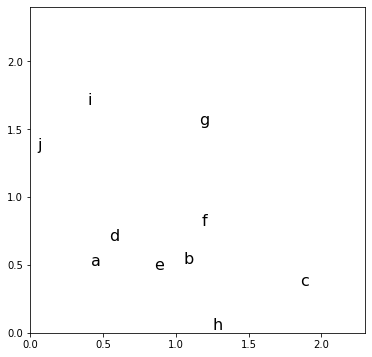

In [3]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.axis([0,2.3,0,2.4]) # większy zasięg
for x,y,t in zip(X,Y,txt,):
    ax.text(x*2,y*2,t,fontsize=16)

# Tytuły i etykiety osi

Można sterować precyzyjnym położeniem etykiet i tytułów względem osi. `pad` (`labelpad`) służy do definiowania odległości o osi, `loc` definiuje wyrównanie. Można go stosować również dla `suptitle`.

Text(0.0, 1.0, 'Tytuł wykresu')

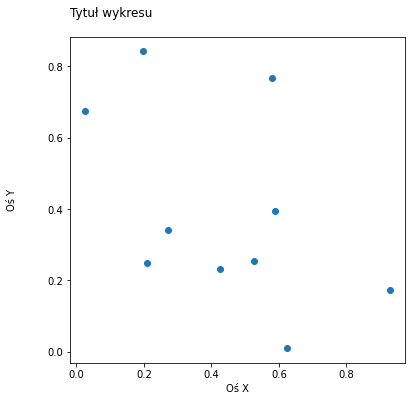

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X,Y)
ax.set_xlabel("Oś X")
ax.set_ylabel("Oś Y",labelpad=30) # w pixelach
ax.set_title("Tytuł wykresu",pad=20,loc='left')

# Formatowanie wyglądu etykiet fontdict

Formatowanie wyglądu pojedynczych etykiet można zrealizować przez słownik parametrów, przekazywany jako fontdict. Parametry, jakie można ustawić w fontdict znajdują się w opisie właściwości tekstu. https://matplotlib.org/stable/tutorials/text/text_props.html. Pojedyncze parametry można też przekazywać osobno. Przydatne zwłaszcza do formatowania tekstu jako narzędzia obsługi danych. Można też mieszać fontdict z parametrami swobodnymi

Text(0.5, 1.0, 'Tytuł wykresu')

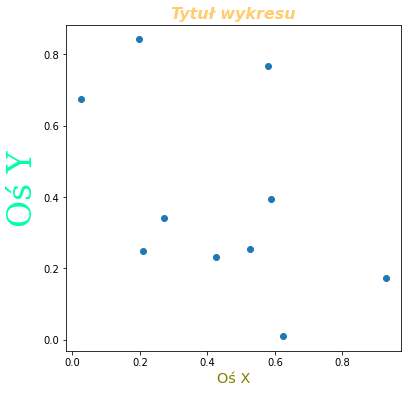

In [5]:
dc1 = font = {'family': 'sans-serif',
        'color':  '#FFAA11',
        'weight': 'heavy',
        'size': 16,
        'style':'oblique'
        }
dc2 = font = {'family': 'serif',
        'color':  '#00FFAA',
        'weight': 'ultralight',
        'size': 33
        }
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X,Y)
ax.set_xlabel("Oś X",color='olive',size='x-large') # styl latex
ax.set_ylabel("Oś Y",fontdict=dc2) 
ax.set_title("Tytuł wykresu",fontdict=dc1,alpha=0.6)

# Formatowanie etykiet znaczników 

ticklabels. Do formatowania znaczników służy metoda `[major,minor] _label_formatter`. Formatowanie wyglądu fontu etykiet znaczników wykonuje się dokładnie tak samo jak pozostałych elementów tekstowych. Label formaters są metodami odpowiednio xaxis i yaxis. Stosowanie formaterów pociąga za sobą wiele problemów, które nie są dobrze omówione w fokumentacji.

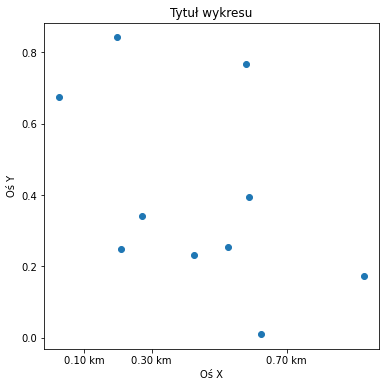

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X,Y)
ax.set_xlabel("Oś X")
ax.set_ylabel("Oś Y") # w pixelach
ax.set_title("Tytuł wykresu")
ax.set_xticks([0.1,0.3,0.7])
ax.xaxis.set_major_formatter('{x:0.2f} km')

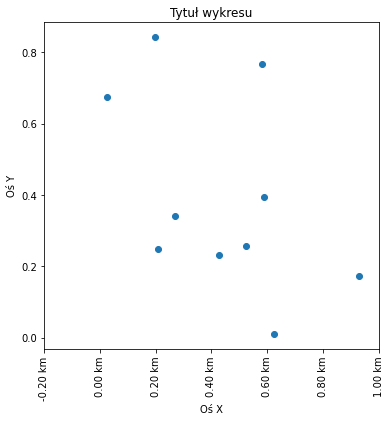

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X,Y)
ax.set_xlabel("Oś X")
ax.set_ylabel("Oś Y") # w pixelach
ax.set_title("Tytuł wykresu")

ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(),rotation=90) # rotation i inne elementy formatowania będą zignorowane jeżeli nie będzie labels. Dla xticks nie można sotosować fontdict
ax.xaxis.set_major_formatter('{x:0.2f} km')

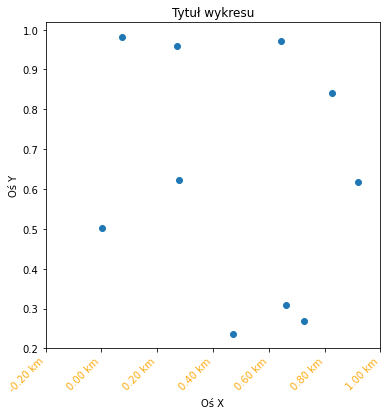

In [9]:
dc = font = {'family': 'sans-serif',
        'color':  '#FFAA11',
        'size': 10,
        'rotation':45,
        'horizontalalignment':'right' # domyślenie center
        }

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X,Y)
ax.set_xlabel("Oś X")
ax.set_ylabel("Oś Y") # w pixelach
ax.set_title("Tytuł wykresu")

#kolejność ma znaczenie
ax.set_xticks(ax.get_xticks()) #FixedLocator
ax.set_xticklabels(ax.get_xticklabels(),fontdict=dc) # , xticklables po set_xticks, teraz można stosować fontdict
ax.xaxis.set_major_formatter('{x:0.2f} km')



# Formatowanie dat

Jeżeli wartości wykresu są rozpoznawane jako daty, można je formatować zgodnie z zasadami formatowania dat

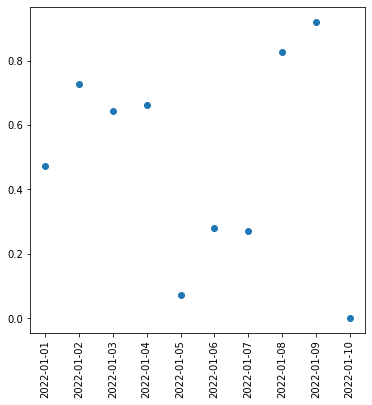

In [12]:
import datetime
time = [datetime.datetime(2022, 1, 1, 0, 0, 1) + datetime.timedelta(days=x) for x in range(len(X))]

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(time,X)
ax.tick_params(axis='x',rotation=90) # uproszczona metoda zmiany parametrów znaczników i etykiet


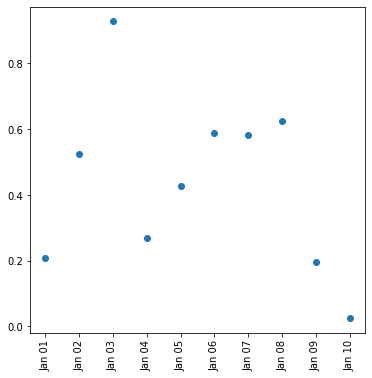

In [10]:
import matplotlib.dates as mdates

formatter = mdates.DateFormatter('%b %d')
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(time,X)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x',rotation=90)


# Formuły matematyczne

Złożone tytuły, etykiety, adnotacje oraz etykiety znaczników możemy budować stosując matematyczne formuły znane z języka latex. Obsługa pełnego latexa zależy od instalacji pakietu **cm-super** oraz doboru czcionki.

Text(0, 0.5, '$\\frac{m}{s{^2}}$')

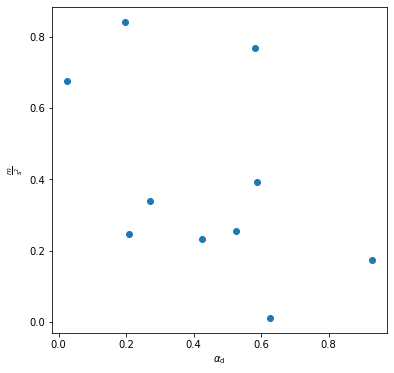

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X,Y)
ax.set_xlabel(r'$\alpha_{\mathrm{d}}$')
ax.set_ylabel(r'$\frac{m}{s{^2}}$')


Możliwość używania latexa wymaga jawneho wywołania usetex oraz wyboru czcionek obsługiwanych przez latex. Formatowanie wyglądu tekstu, odbywa się w taki sam sposób, jak w pozostałych przypadkach, tj przez `kwargs` lub `fontdict`.

In [12]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

Text(0.3, 0.7, '$\\displaystyle\\sum_{n=1}^\\infty \\frac{-e^{i\\pi}}{2^n}$!')

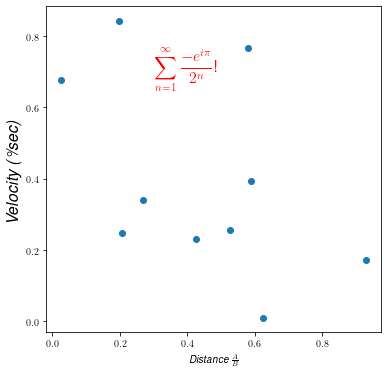

In [13]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X,Y)
ax.set_xlabel(r'\textit{Distance} $\frac{A}{B}$')
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
ax.text(0.3,0.7,r'$\displaystyle\sum_{n=1}^\infty \frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')

# Adnotacje

Adnotacje działają podobnie jak `text`, różnica polega na możliwości dodania strzałki wskazującej konkretne miejsce. Lokalizacja stzałki i tekstu może być podana w skali danych (domyślnie) lub innych skalach odniesienia. Wygląd strzałki można znacząco zmodyfikować. https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyArrowPatch.html#matplotlib.patches.FancyArrowPatch

Text(0.8271926186365218, 0.3691713277336286, 'ta obserwacja wymaga uwagi')

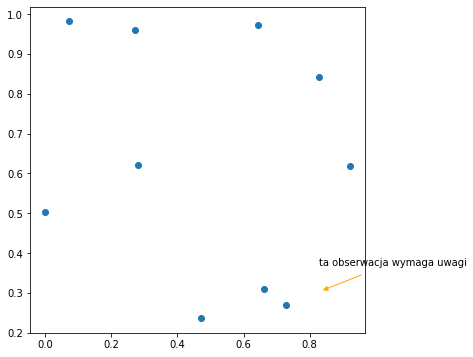

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X,Y)
ax.annotate('ta obserwacja wymaga uwagi', xy=(X[1],Y[1]), xytext=(X[1]+0.1,Y[1]+0.1),
            arrowprops=dict(color='orange', arrowstyle="-|>", shrinkA=15, shrinkB=40))